# **Chapter 6 - Exercises**

## **Exercise 1: Basic Math**

Using math module compute the following: 

- For a = 2.3, find the ceil of a
- For a 2.3, find the floor of a
- For a = 5, find the factorial of a
- Find the value of 2^3
- For a = 16, find the square root of a

In [11]:
import math
 
a = 2.3

# Ceiling and Floor
print(f'a = {a}')
print(f'Ceil: {math.ceil(a)}')
print(f'Floor: {math.floor(a)}')

a = 5

# Factorial
print(f'\na = {a}')
print(f'Factorial: {math.factorial(a)}')

# Power
print(f'\n2^3: {math.pow(2, 3)}')

a = 16

# Square root
print(f'\na = {a}')
print(f'Square Root: {math.sqrt(a)}')

a = 2.3
Ceil: 3
Floor: 2

a = 5
Factorial: 120

2^3: 8.0

a = 16
Square Root: 4.0


## **Exercise 2: Numpy Array**

For the array **a = [20,23,82,40,32,15,67,52]**, print the output of the following:

- Find the indices of even numbers
- Sort the array
- Slice elements from index 3 to the end of the array
- Slice elements from index 0 to index 4
- Print [32, 15, 67] using negative slicing

In [30]:
import numpy as np

a = np.array([20,23,82,40,32,15,67,52])

# Get the indices of even numbers
even = np.where(a % 2 == 0)
print(f'Even number indices: {even}')

# Sort numpy array
sort = np.sort(a)
print(f'\nSorted Array: {sort}')

# Slice from index 3 to end of array
print(f'\nSliced from index 3 to end of array: {a[2: -1]}')

# Slice elements from index 0 to index 4
print(f'\nSliced from index 0 to index 4: {a[0:4]}')

# Negative slicing
print(f'\n[32, 15, 67] with negative slicing: {a[-4:-1]}')

Even number indices: (array([0, 2, 3, 4, 7], dtype=int64),)

Sorted Array: [15 20 23 32 40 52 67 82]

Sliced from index 3 to end of array: [82 40 32 15 67]

Sliced from index 0 to index 4: [20 23 82 40]

[32, 15, 67] with negative slicing: [32 15 67]


## **Exercise 3: Calculator**

Write a program that will display the following calculator menu:

1. Add
2. Subtract
3. Multiply
4. Divide
5. Modulus
6. Check greater number

The program will prompt the user to choose the operation choice (from 1 to 6). The it asks the user to input values for the calculation. The program outputs the results of the calculation. Use operator module functions.

### **Extension Problem (Optional):**

- Allow the user to keep entering values until they enter Q to quit.
- Handle correct input.

In [396]:
# Import operator module
import operator
import random

# Calculator class
class Calculator:
    def __init__(self, random_values:bool = False):
        self.random_values = random_values
    
        # Operation Dictionary
        self._op_dict = {1 : 'Addition',
                         2 : 'Subtraction',
                         3 : 'Multiplication',
                         4 : 'Division',
                         5 : 'Modulus',
                         6 : 'Greater than'}
        
        # Print out menu
        self.menu()

        # Get chosen operator
        self.operation = self._get_operation()

        # Set values
        self.values = self._get_values()

        # Calculate results
        self.result = None
        
        # Perform operation
        self._conditions()

    # Addition
    def _add(self):
        sm = 0
        for i in self.values:
            sm = operator.add(sm, i)
        self.result = sm
    
    # Subtraction
    def _subtract(self):
        diff = self.values[0] # Set as value at 0th index
        neg_idx = -(len(self.values) - 1) # Create negative index pointer i.e., -(n - 1) with n being the length of the list

        # Iteratively subtract elements with negative indexing
        for i in range(len(self.values)-1): # (n - 1) with n being the length of the list to exclude 0th/-nth index value
            diff = operator.sub(diff, self.values[neg_idx])
            neg_idx+=1 
        self.result = diff
    
    # Mulitplication
    def _multiply(self):
        prod = 1 
        for i in self.values:
            prod = operator.mul(prod, i)
        self.result = prod
    
    # Division
    def _divide(self):
        quo = 1
        for i in self.values:
            quo = operator.truediv(quo, i)
        self.result = quo
    
    # Modulus
    def _modulus(self):
        # Only perform operation when values list contains two values
        if len(self.values) == 2:
            mod = operator.mod(*self.values)
            self.result = mod if mod > 0 else 0
        
        else:
            print('Input Error: Cannot perform modulus operation with more than 2 values.')
    
    # Greater than
    def _greater_than(self):
        max = 0
        for idx, val in enumerate(self.values):
            max = val if operator.gt(val, self.values[idx-1]) else self.values[idx-1]
        self.result = max

    def menu(self):
        print(f'\tCalculator\n1. Add\n2.Subtract\n3.Multiply\n4.Divide\n5.Modulus\n6.Check greater number')

    # Get operation from user input
    def _get_operation(self):
        opt = ''
        while opt.isnumeric() == False:
            opt = input('Pick a number from the selection above: ')
        
        return self._op_dict[int(opt)]
    
    # Set user-defined or random values
    def _get_values(self):
        values = []

        if self.random_values == True:
            # Set size of list
            size = int(input('Enter Total Number of Values: '))

            # Get range of values for list (min - max) to randomly choose from
            min_val = int(input('Enter Min Value: '))
            max_val = int(input('Enter Max Value: '))

            if min_val > max_val:
                print(f'Input Error: Max Value must be greater than Min Value.')

            else:
                for i in range(size):
                    values.append(random.randint(min_val, max_val))

        else:
            while True:
                inp = input("Enter Values (Press 'Q' to stop inputting values): ")

                if inp.lower() == 'q':
                    break
                
                values.append(int(inp))

        return values
    
    # Conditions on which operation to perform-
    def _conditions(self):
        if self.operation == 'Addition':
            self._add()

        if self.operation == 'Subtraction':
            self._subtract()

        if self.operation == 'Multiplication':
            self._multiply()

        if self.operation == 'Division':
            self._divide()

        if self.operation == 'Modulus':
            self._modulus()
        
        if self.operation == 'Greater than':
            self._greater_than()
    
    # Display calculator summary i.e., Operation, Values, Result
    def calc_summary(self):
        print(f'\nCalculator Summary\n------------------\nOperation : {self.operation}\nValues : {self.values}\nResult : {self.result}')

In [384]:
# Addtion Operator
add = Calculator()
add.calc_summary()

	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Addition
Values : [1, 2, 3, 4, 5]
Result : 15


In [386]:
# Subtraction Operator
sub = Calculator()
sub.calc_summary()

	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Subtraction
Values : [1, 2, 3, 4, 5]
Result : -13


In [387]:
# Multiplication Operator
mul = Calculator()
mul.calc_summary()

	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Multiplication
Values : [1, 2, 3, 4, 5]
Result : 120


In [388]:
# Division Operator
div = Calculator()
div.calc_summary()

	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Division
Values : [1, 2, 3, 4, 5]
Result : 0.008333333333333333


In [393]:
# Modulus Operator
mod = Calculator()
mod.calc_summary()

	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Modulus
Values : [3420, 36]
Result : 0


In [394]:
# Greater than Operator
gt = Calculator()
gt.calc_summary()

	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Greater than
Values : [1, 2, 3, 4, 5]
Result : 5


In [398]:
# With random values
rand_add = Calculator(random_values = True)
rand_add.calc_summary()

rand_sub = Calculator(random_values = True)
rand_sub.calc_summary()

	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Addition
Values : [23, 24, 14, 47, 13, 29, 28, 24, 9, 3]
Result : 214
	Calculator
1. Add
2.Subtract
3.Multiply
4.Divide
5.Modulus
6.Check greater number

Calculator Summary
------------------
Operation : Subtraction
Values : [14, 26, 21, 24, 24, 42, 12, 16, 20, 22]
Result : -193


## **Exercise 4: Stack Bar Graph**

In January 2007, a Gallup poll asked 1008 Americans aged 18 and over whether they planned to watch the upcoming Super Bowl. The pollster also asked who planned to watch whether they were looking forward more to watch football games or commercials. The results were summarized in the table.

                    Male	 Female	  Total
    Game		279	  200	    479
    Commercials	81	  156	    237
    won’t watch	132	  160	    292
    Total		492	  516	    1008

In [284]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Create dictionary out of poll data 
poll_dict = {'Male' : [279, 81, 132, 492], 'Female' : [200, 156, 160, 516], 'Total' : [479, 237, 292, 1008]}
indices = ['Game', 'Commercials', "Won't Watch", 'Total']

# Create dataframe from dictionary
poll_df = pd.DataFrame(poll_dict, index = indices)
poll_df

,Male,Female,Total
Game,279,200,479
Commercials,81,156,237
Won't Watch,132,160,292
Total,492,516,1008


In [283]:
# Drop Total row for matching shapes when setting x and y values
poll_df = poll_df.drop('Total', axis = 0)

# Set x and y values
x = np.array(indices[0:3])
y1, y2 = np.array(poll_df['Male']), np.array(poll_df['Female'])

# Check shapes
print(f'x shape: {x.shape}')
print(f'y values shape: {y1.shape}')

x shape: (3,)
y values shape: (3,)


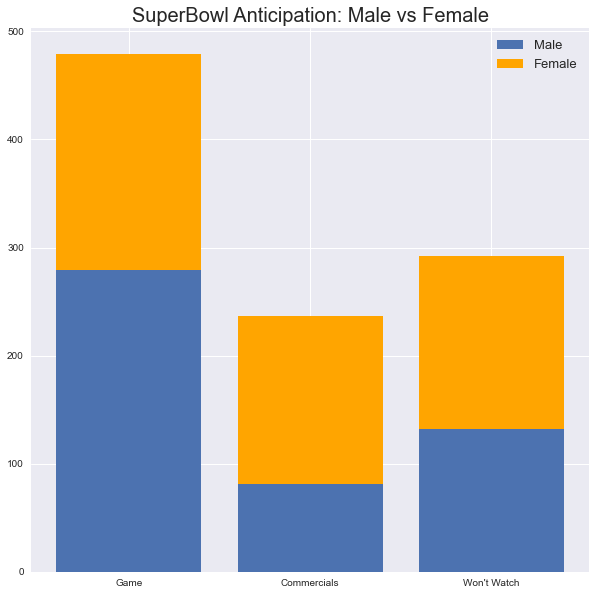

In [277]:
# Set plot style
style.use('seaborn')

# Plot Stacked Graph
plt.figure(figsize = (10, 10))
plt.bar(x, y1)
plt.bar(x, y2, bottom = y1, color = 'orange')
plt.title('SuperBowl Anticipation: Male vs Female', fontsize = 20)
plt.legend(['Male', 'Female'], fontsize = 13)